# Neural Network Example Using Fashion MNIST dataset (Fully connected)
Link: https://medium.com/@chamara95.eng/neural-network-example-using-fashion-mnist-dataset-c19b48c86cf1

In [25]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [26]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.size)
print(test_labels.size)
print(train_images)
print(test_images)

(60000, 28, 28)
(10000, 28, 28)
60000
10000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0

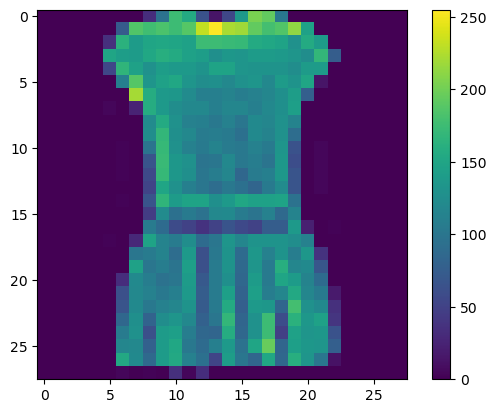

In [29]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

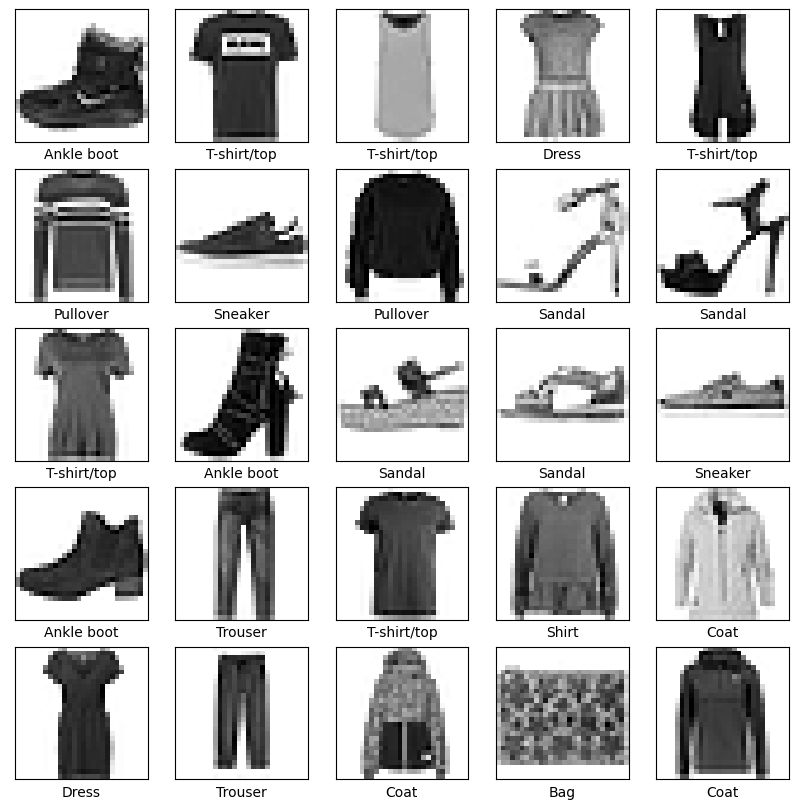

In [31]:
plt.figure(figsize=(10, 10))
for i in range(25):
   plt.subplot(5, 5, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(train_images[i], cmap=plt.cm.binary)
   plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [33]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 485us/step - loss: 0.5016 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 1s 492us/step - loss: 0.3792 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 1s 490us/step - loss: 0.3393 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 1s 488us/step - loss: 0.3175 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 1s 491us/step - loss: 0.2958 - accuracy: 0.8912


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 345us/step - loss: 0.3437 - accuracy: 0.8787


In [36]:
predications = model.predict(test_images)
print(predications[0])

[1.4826520e-07 3.3686918e-09 6.6658195e-09 1.1800509e-08 9.5904529e-09
 4.0028924e-03 6.1360780e-08 1.3963954e-02 6.3731964e-06 9.8202652e-01]


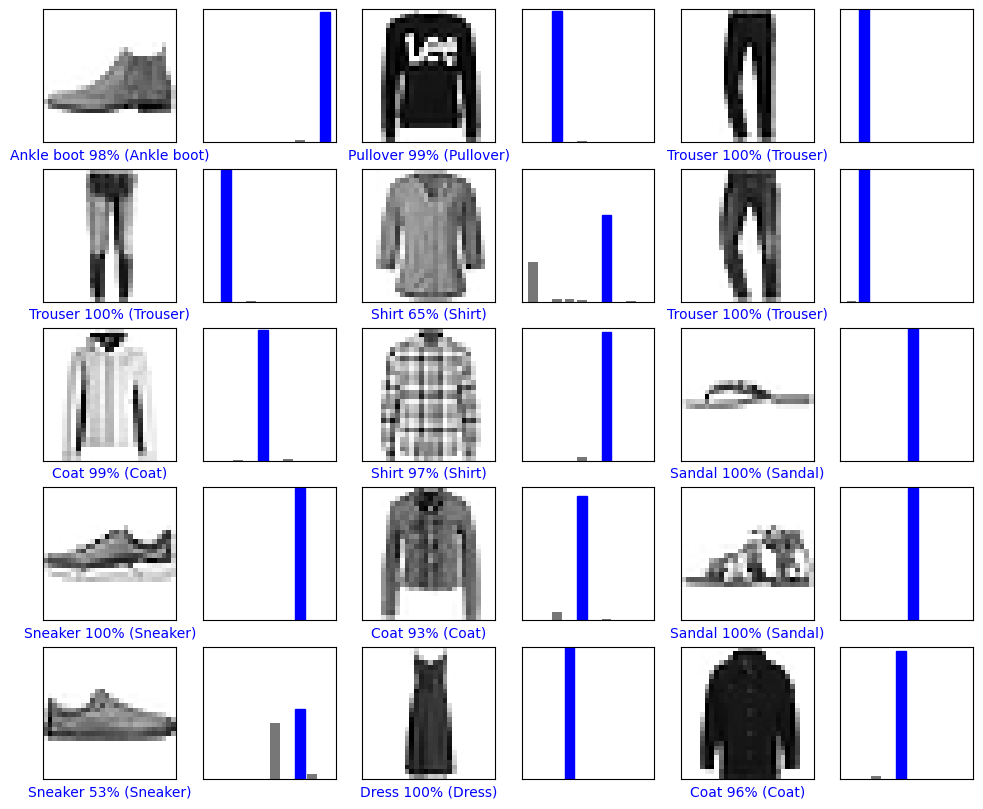

In [37]:
def plot_image(i, predications_array, true_label, img):
   predications_array, true_label, img = predications_array[i], true_label[i], img[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])

   plt.imshow(img, cmap=plt.cm.binary)

   predicted_label = np.argmax(predications_array)
   if predicted_label == true_label:
      color = 'blue'
   else:
      color = 'red'

   plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predications_array),
                                 class_names[true_label]),
                                 color=color)

def plot_value_array(i, predications_array, true_label):
   predications_array, true_label = predications_array[i], true_label[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot = plt.bar(range(10), predications_array, color="#777777")
   plt.ylim([0, 1])
   predicted_label = np.argmax(predications_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
   plt.subplot(num_rows, 2*num_cols, 2*i+1)
   plot_image(i, predications, test_labels, test_images)
   plt.subplot(num_rows, 2*num_cols, 2*i+2)
   plot_value_array(i, predications, test_labels)
plt.show()

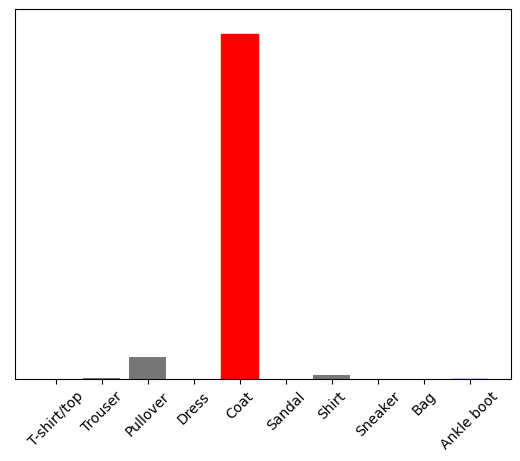

In [38]:
img = test_images[10]
img = (np.expand_dims(img, 0))
predications_single = model.predict(img)

plot_value_array(0, predications_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()